## ECON 220 Lab - Data Science for Economists
### Week 3. Introduction to Python (I)
Jafet Baca-Obando, 09/12/2025

### Step 1. Import packages

Our very first step is to import the libraries we will be using. We're assumming these librares are already installed in your Python environment. If not, please refer to the installation instructions provided in the Week 2 notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Load dataset

We'll load the flights dataset from a CSV file. The `pd.read_csv()` function reads the comma-separated values file and creates a pandas DataFrame object that we can work with for our analysis.

In [2]:
path = "C:/Users/jbaca/OneDrive/Documents/2. Ph.D. in Economics/Courses/Semester 7 - Fall 2025/ECON 220 - Data Science for Economists - Lab/Lectures/Week 3/flights.csv"
flights = pd.read_csv(path)

### Step 3. Basic exploration of the dataset

Before analyzing our data, it's important to understand its structure and contents. We'll examine the dataset's dimensions, data types, and preview the first and last few rows.

In [3]:
flights.shape

(1000, 10)

The `.shape` attribute returns a tuple showing the number of rows and columns in our DataFrame. This gives us a quick overview of the dataset size. In particular, our dataset has 1000 rows and 10 columns.

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1000 non-null   int64  
 1   month           1000 non-null   int64  
 2   day             1000 non-null   int64  
 3   dep_time        971 non-null    float64
 4   sched_dep_time  1000 non-null   int64  
 5   arr_time        969 non-null    float64
 6   sched_arr_time  1000 non-null   int64  
 7   distance        1000 non-null   int64  
 8   origin          1000 non-null   object 
 9   dest            1000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 78.3+ KB


The `.info()` method provides a comprehensive summary of the DataFrame including data types, non-null counts, and memory usage. This helps us identify missing values and understand the nature of each column. `int64` indicates integer values, while `float64` indicates floating-point numbers. The `object` type typically represents categorical data, like names.

In [5]:
flights.head(10)

,year,month,day,dep_time,sched_dep_time,arr_time,sched_arr_time,distance,origin,dest
0,2013,3,25,1929.0,1905,2236.0,2217,1068,EWR,RSW
1,2013,4,26,956.0,1000,1257.0,1334,2586,JFK,SFO
2,2013,5,21,1320.0,1309,1430.0,1414,199,EWR,DCA
3,2013,7,18,1222.0,1230,1357.0,1419,529,EWR,CLT
4,2013,8,29,540.0,545,921.0,921,1576,JFK,BQN
5,2013,11,14,2031.0,2025,2342.0,2340,2475,JFK,LAX
6,2013,3,30,1755.0,1755,2110.0,2114,2475,JFK,LAX
7,2013,8,10,1544.0,1545,2003.0,2001,1598,JFK,SJU
8,2013,3,27,1855.0,1900,2019.0,2028,184,JFK,BWI
9,2013,5,13,1912.0,1915,2055.0,2154,2153,JFK,PHX


The `.head(10)` method displays the first 10 rows of our dataset, allowing us to see what the actual data looks like and understand the structure of each observation.

In [6]:
flights.tail(10)

,year,month,day,dep_time,sched_dep_time,arr_time,sched_arr_time,distance,origin,dest
990,2013,8,21,2245.0,2245,2.0,3,264,JFK,ROC
991,2013,3,12,624.0,631,731.0,740,187,JFK,BOS
992,2013,12,13,1530.0,1500,1755.0,1730,762,LGA,ATL
993,2013,6,2,1427.0,1340,1636.0,1555,2133,EWR,PHX
994,2013,11,19,1311.0,1315,1644.0,1657,2153,JFK,PHX
995,2013,5,14,1432.0,1435,1552.0,1600,184,JFK,BWI
996,2013,3,24,634.0,630,1002.0,1040,1598,JFK,SJU
997,2013,3,11,1124.0,1130,1308.0,1339,1020,LGA,MSP
998,2013,9,28,1735.0,1734,1953.0,2000,762,LGA,ATL
999,2013,8,24,626.0,630,736.0,747,301,JFK,BUF


The `.tail(10)` method shows the last 10 rows of the dataset. This is useful to check if the data format is consistent throughout the entire dataset and to spot any potential issues at the end of the file.

### Step 4. Creating new variables

Here we create two new variables by calculating the difference between scheduled and actual times. Note that positive values indicate early arrivals/departures and negative values indicate delays.

In [7]:
flights["arr_delay"] = flights["sched_arr_time"] - flights["arr_time"]
flights["dep_delay"] = flights["sched_dep_time"] - flights["dep_time"]
flights.head(10)

,year,month,day,dep_time,sched_dep_time,arr_time,sched_arr_time,distance,origin,dest,arr_delay,dep_delay
0,2013,3,25,1929.0,1905,2236.0,2217,1068,EWR,RSW,-19.0,-24.0
1,2013,4,26,956.0,1000,1257.0,1334,2586,JFK,SFO,77.0,44.0
2,2013,5,21,1320.0,1309,1430.0,1414,199,EWR,DCA,-16.0,-11.0
3,2013,7,18,1222.0,1230,1357.0,1419,529,EWR,CLT,62.0,8.0
4,2013,8,29,540.0,545,921.0,921,1576,JFK,BQN,0.0,5.0
5,2013,11,14,2031.0,2025,2342.0,2340,2475,JFK,LAX,-2.0,-6.0
6,2013,3,30,1755.0,1755,2110.0,2114,2475,JFK,LAX,4.0,0.0
7,2013,8,10,1544.0,1545,2003.0,2001,1598,JFK,SJU,-2.0,1.0
8,2013,3,27,1855.0,1900,2019.0,2028,184,JFK,BWI,9.0,45.0
9,2013,5,13,1912.0,1915,2055.0,2154,2153,JFK,PHX,99.0,3.0


### Step 4. Basic visualization

We'll create histograms to visualize the distribution of departure delays. Histograms help us understand the frequency distribution and identify patterns such as skewness, outliers, and the typical range of values.

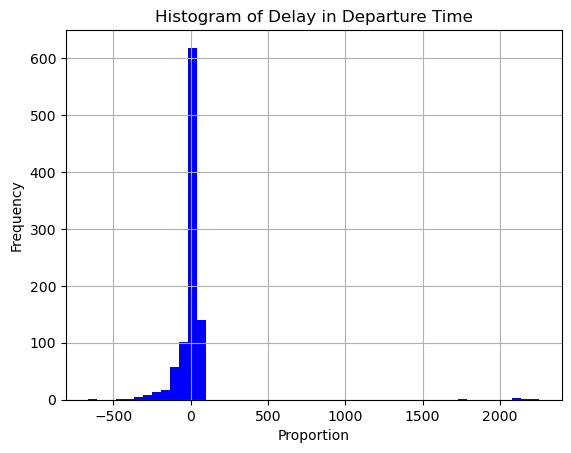

In [8]:
plt.figure()
flights['dep_delay'].hist(bins=50, color='blue')
plt.title('Histogram of Delay in Departure Time')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.show()

This code creates a histogram of all departure delays using matplotlib. We use 50 bins to get a detailed view of the distribution, set the color to blue, and add appropriate labels and title for clarity.

Since extreme outliers can make it difficult to see the main distribution pattern, we'll create a filtered version that excludes departure delays greater than 100/-100 minutes. This gives us a clearer view of the typical delay patterns.

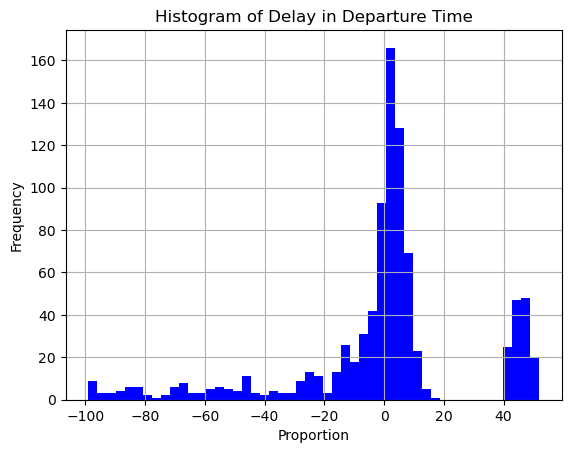

In [9]:
filtered_flights = flights[(flights['dep_delay'] <= 100) & (flights['dep_delay'] >= -100)]
plt.figure()
filtered_flights['dep_delay'].hist(bins=50, color='blue')
plt.title('Histogram of Delay in Departure Time')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.show()

This histogram shows that small departure delays are the rule more than the exception. The mode of departure delays is 0 minutes, indicating that many flights depart on time.

### Step 6. Compute means and variances

In [10]:
destinations_mean = flights.groupby('dest')['arr_delay'].mean()
sorted_means = destinations_mean.sort_values(ascending=True)
sorted_means.head(10)

dest
PSE   -120.500000
SMF   -116.000000
CHO    -88.000000
JAC    -80.000000
BHM    -71.000000
BDL    -65.000000
CHS    -52.428571
GSP    -50.000000
DAY    -44.750000
MTJ    -44.000000
Name: arr_delay, dtype: float64

Here we use the `groupby()` method to group flights by destination airport and calculate the mean arrival delay for each destination. The `.sort_values(ascending=True)` method orders the results from highest to lowest average delays, helping us identify which destinations have the worst delay performance.

In this case, the airport with the highest arrival delay is Mercedita International Airport (PSE) in Puerto Rico, with an average delay of approximately 120.5 minutes. In second place we have Sacramento International Airport (SMF) in California, with an average delay of about 116.0 minutes

Let's compute the variance of arrival delays for each destination airport. Variance measures how much the arrival delays vary around the mean delay, giving us insight into the consistency of flight arrivals to each destination.

In [11]:
destinations_var = flights.groupby('dest')['arr_delay'].var()
sorted_vars = destinations_var.sort_values(ascending=False)
sorted_vars.head(10)

dest
SDF    1.695850e+06
TYS    1.468664e+06
BUR    1.361047e+06
MHT    9.950217e+05
RIC    7.754486e+05
AUS    5.160878e+05
RSW    3.354831e+05
SFO    3.194438e+05
SEA    3.184599e+05
PBI    2.904491e+05
Name: arr_delay, dtype: float64

The results indicate that Louisville International Airport (SDF) in Kentucky has the highest variance in arrival delays, suggesting that flights to this destination experience a wide range of delays.

We finally compute descriptive statistics for several columns at once.

In [12]:
for airport in ['ATL', 'ORD', 'LAX']:
    flights["arr_delay_" + airport] = np.where(flights["dest"] == airport, flights["arr_delay"], np.nan)

This code creates airport-specific delay columns using `np.where()`, which works like an if-else statement. For each airport (ATL, ORD, LAX), we create a new column that contains the arrival delay value only for flights to that destination, and NaN (missing value) for all other flights.

In [13]:
flights[["arr_delay_ATL", "arr_delay_ORD", "arr_delay_LAX"]].describe()

,arr_delay_ATL,arr_delay_ORD,arr_delay_LAX
count,54.000000,47.000000,37.000000
mean,-15.870370,-16.234043,0.783784
std,64.779174,66.180324,535.230279
min,-265.000000,-218.000000,-2328.000000
25%,-14.750000,-27.500000,-6.000000
50%,2.500000,1.000000,9.000000
75%,16.000000,16.500000,34.000000
max,89.000000,80.000000,2192.000000


In [14]:
for airport in ['EWR', 'JFK', 'LGA']:
    flights["dep_delay_" + airport] = np.where(flights["origin"] == airport, flights["dep_delay"], np.nan)
flights[["dep_delay_EWR", "dep_delay_JFK", "dep_delay_LGA"]].describe()

,dep_delay_EWR,dep_delay_JFK,dep_delay_LGA
count,346.000000,320.000000,305.000000
mean,-12.849711,3.506250,2.773770
std,132.909430,222.940972,168.986894
min,-662.000000,-397.000000,-307.000000
25%,-15.000000,-9.000000,-8.000000
50%,0.000000,1.500000,3.000000
75%,5.000000,6.000000,10.000000
max,2093.000000,2256.000000,2129.000000


The `.describe()` method provides comprehensive descriptive statistics (count, mean, standard deviation, quartiles, min, max) for the three airport-specific delay columns. This allows us to compare delay patterns across these major airports side by side.

According to the summary statistics, Los Angeles International Airport (LAX) experience lower arrival delays on average compared to Hartsfield-Jackson Atlanta International Airport (ATL) and O'Hare International Airport (ORD). However, LAX also has a higher standard deviation, indicating more variability in arrival delays.

### Step 7. Convert Jupyter notebook to HTML


In [15]:
!jupyter nbconvert --to html "Week 3. Introduction to Python (II).ipynb"

[NbConvertApp] Converting notebook Week 3. Introduction to Python (II).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 371853 bytes to Week 3. Introduction to Python (II).html


This command converts the Jupyter notebook to an HTML file, which is useful for sharing your analysis results with others who may not have Jupyter installed. The `!` prefix allows us to run shell commands directly from within the notebook. The `--to html` flag specifies the output format.